**PART ONE - NN REGRESSOR**

In [70]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [71]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers
import seaborn as sns

In [73]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving datasetNN.csv to datasetNN (2).csv


In [74]:
train_data = pd.read_csv("datasetNN.csv")
train_data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [75]:
train_data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

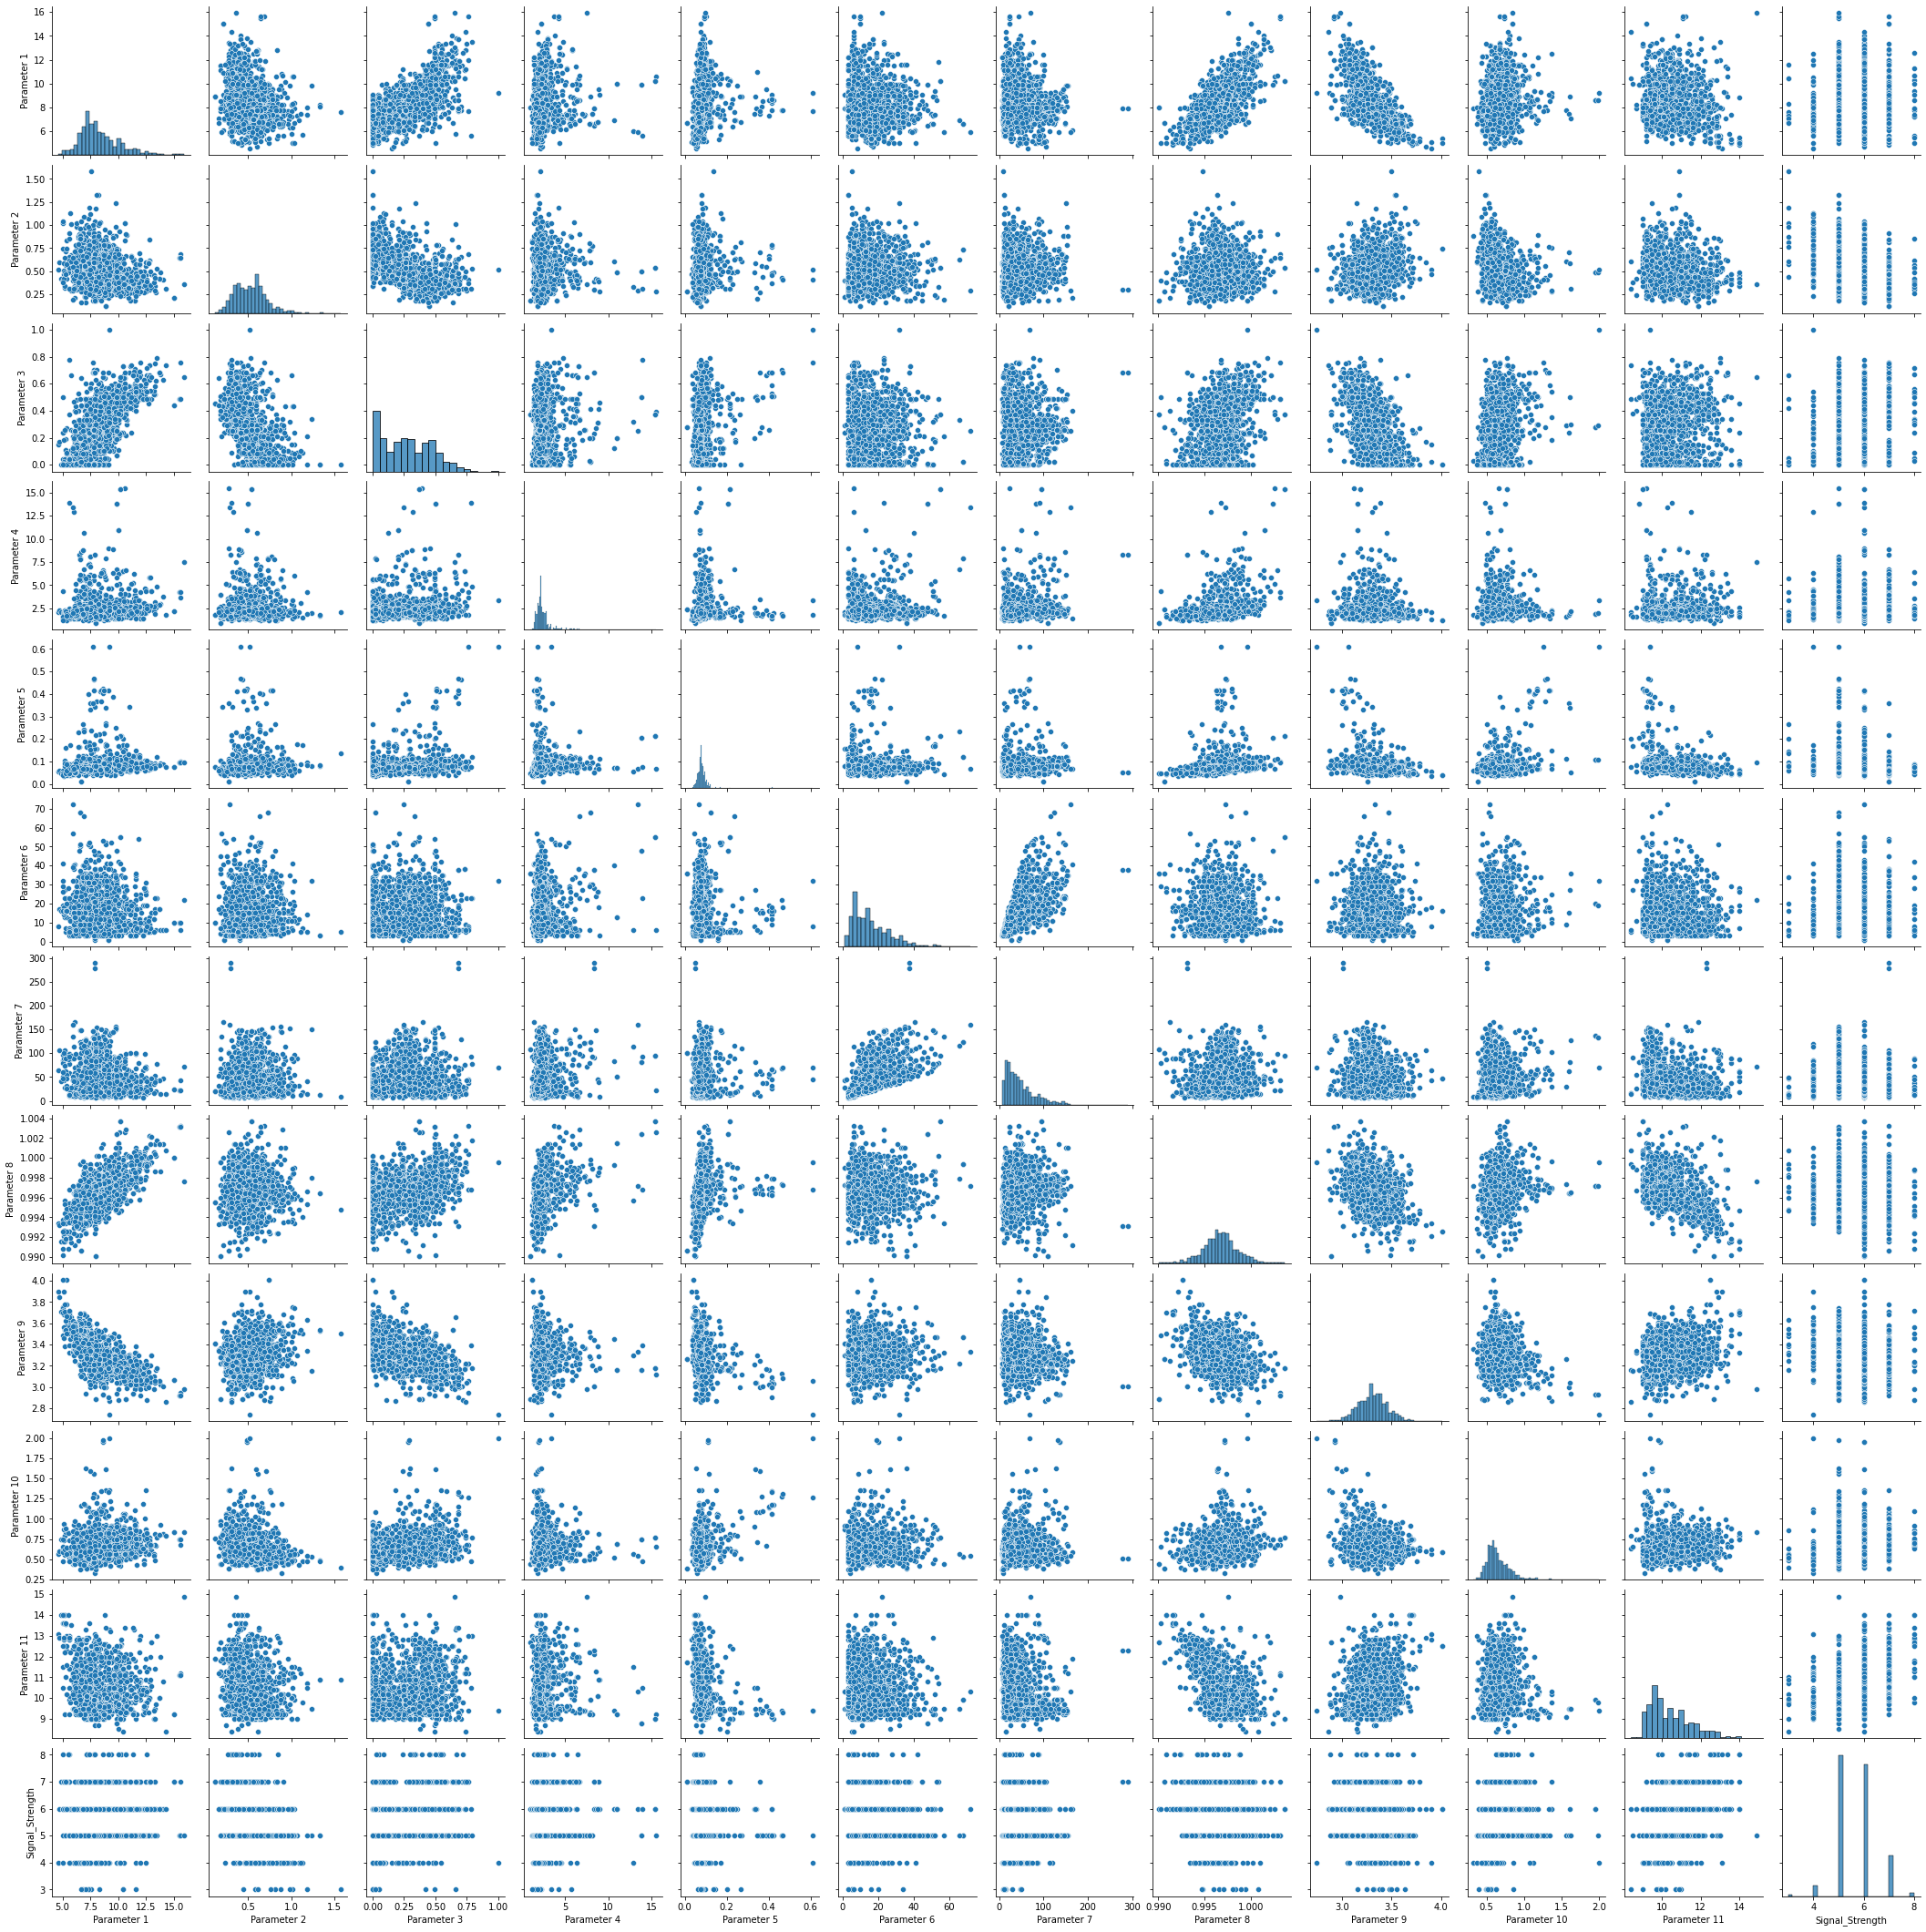

In [76]:
sns.pairplot(train_data)

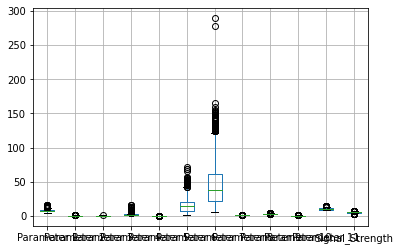

In [77]:
train_data.boxplot()

In [78]:
train_data.shape

(1599, 12)

In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [80]:
train_data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [81]:
train_data.corr()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [98]:
model = tensorflow.keras.models.Sequential()
model.add(tensorflow.keras.layers.BatchNormalization(input_shape=(11,)))
model.add(tensorflow.keras.layers.Dense(6, kernel_initializer='normal', activation='relu'))
model.add(tensorflow.keras.layers.Dense(1))

In [99]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 11)                44        
_________________________________________________________________
dense_59 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 7         
Total params: 123
Trainable params: 101
Non-trainable params: 22
_________________________________________________________________


In [100]:
model.compile(optimizer='sgd', loss='mse')

In [101]:
from sklearn.model_selection import train_test_split
X = train_data.drop(['Signal_Strength'], axis=1)
y = train_data[['Signal_Strength']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [102]:
X_train

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1
1418,7.8,0.530,0.01,1.60,0.077,3.0,19.0,0.99500,3.16,0.46,9.8
468,11.4,0.360,0.69,2.10,0.090,6.0,21.0,1.00000,3.17,0.62,9.2
1397,7.3,0.590,0.26,2.00,0.080,17.0,104.0,0.99584,3.28,0.52,9.9
1303,8.0,0.280,0.44,1.80,0.081,28.0,68.0,0.99501,3.36,0.66,11.2
...,...,...,...,...,...,...,...,...,...,...,...
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9
326,11.6,0.530,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5
321,9.3,0.610,0.26,3.40,0.090,25.0,87.0,0.99975,3.24,0.62,9.7
1081,7.9,0.300,0.68,8.30,0.050,37.5,289.0,0.99316,3.01,0.51,12.3


In [103]:
X_test

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
1362,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333
726,8.1,0.720,0.09,2.8,0.084,18.0,49.0,0.99940,3.43,0.72,11.100000
1569,6.2,0.510,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.500000
1348,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.500000
298,7.2,0.650,0.02,2.3,0.094,5.0,31.0,0.99930,3.67,0.80,9.700000
...,...,...,...,...,...,...,...,...,...,...,...
1173,7.6,0.360,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.500000
221,7.4,0.530,0.26,2.0,0.101,16.0,72.0,0.99570,3.15,0.57,9.400000
1381,6.8,0.830,0.09,1.8,0.074,4.0,25.0,0.99534,3.38,0.45,9.600000
1487,6.0,0.640,0.05,1.9,0.066,9.0,17.0,0.99496,3.52,0.78,10.600000


In [104]:
y_train

,Signal_Strength
1564,5
1418,5
468,6
1397,5
1303,5
...,...
127,5
326,7
321,5
1081,7


In [105]:
y_test

,Signal_Strength
1362,6
726,6
1569,6
1348,5
298,5
...,...
1173,6
221,5
1381,5
1487,5


In [111]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 0.3896
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 0.3735
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 0.3748
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 0.3690
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 0.3744
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 0.3853
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 0.3786
Epoch 8/200
34/34 [==============================] - 0s 992us/step - loss: 0.3775
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 0.3802
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 0.3741
Epoch 11/200
34/34 [==============================] - 0s 1ms/step - loss: 0.3801
Epoch 12/200
34/34 [==============================] - 0s 1ms/step - loss: 0.3752
Epoch 13/200
34/34 [===============

In [90]:
model.save('C:/Users/mugdha/Desktop/ML')

INFO:tensorflow:Assets written to: C:/Users/mugdha/Desktop/ML/assets


In [112]:
preds = model.predict(X_test)
preds

array([[5.678612 ],
       [5.7695866],
       [5.8047256],
       [4.7364197],
       [5.422769 ],
       [6.2104893],
       [5.556852 ],
       [6.3268948],
       [5.927084 ],
       [5.1709013],
       [5.291509 ],
       [6.095821 ],
       [5.4357004],
       [6.319692 ],
       [5.0315704],
       [5.8188634],
       [5.8198204],
       [6.4320436],
       [5.511143 ],
       [5.359778 ],
       [5.0005174],
       [5.8552485],
       [5.9716024],
       [5.4781847],
       [5.4218864],
       [4.3998346],
       [5.6382513],
       [6.234997 ],
       [5.4722033],
       [5.2375565],
       [5.4530134],
       [4.96599  ],
       [5.542122 ],
       [5.214192 ],
       [4.793332 ],
       [5.1346335],
       [5.825513 ],
       [5.59017  ],
       [6.2141476],
       [4.7315207],
       [5.955758 ],
       [5.090152 ],
       [5.621027 ],
       [5.391567 ],
       [5.009639 ],
       [5.3083944],
       [6.093175 ],
       [5.058098 ],
       [5.775918 ],
       [5.190489 ],


In [113]:
import sklearn.metrics as sm
mae = round(sm.mean_absolute_error(y_test, preds), 2)
mse = round(sm.mean_squared_error(y_test, preds), 2)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)

Mean Absolute Error:  0.5
Mean Squared Error:  0.41


**PART TWO - NN CLASSIFIER**

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(1071, 1)

In [131]:
from keras.models import Sequential
from keras.layers import Flatten,Activation,Dense
classifierModel = Sequential()
classifierModel.add(Dense(activation = "relu" ,input_dim = 11, units = 6))
#adding hidden layer
classifierModel.add(Dense(6, activation = "relu"))
#adding output layer
classifierModel.add(Dense(1, activation = "softmax"))
classifierModel.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ['accuracy'])
classifierModel.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_68 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [132]:
classifierModel.fit(x=X_train, y=y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
34/34 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accura

**PART THREE - GUI**

In [ ]:
import tkinter as tk
from tkinter import ttk
import re
import matplotlib
win.title('Assignment - GUI')
#import dataframe name
Name = ttk.Label(win,text="Step 1: File Name")
Name.grid(row=0,column=0,sticky=tk.W)
Name_var = tk.StringVar()
Name_entrybox.grid(row=0,column=1)
def Import_Data():
  global DB
  DF_Name = Name_var.get()
  DB_extension = re.findall("\..*", DF_Name)
  if DB_extension == ['.xlsx']:
    DB = pd.read_excel(DF_Name)
  elif DB_extension == ['.csv']:
    DB = pd.read_csv(DF_Name)
  confirm = "Done"
  confirm_entrybox = ttk.Entry(win,width=16)
  confirm_entrybox.grid(row=0,column=1)
  confirm_entrybox.insert(1,str(confirm))
Import_Data_Button = ttk.Button(win, text = "Import Data", command=Import_Data)
Import_Data_Button.grid(row=0,column=2)

TargetVar = ttk.Label(win,text="Step 2: Target Column")
TargetVar.grid(row=1,column=0,sticky=tk.W)
TargetVar_name = tk.StringVar()
TargetVar_entrybox.grid(row=0,column=1)
def Target():
  global Target
  Target = TargetVar_name.get()
  confirm = "Done"
  confirm_entrybox = ttk.Entry(win,width=16)
  confirm_entrybox.grid(row=0,column=1)
  confirm_entrybox.insert(1,str(confirm))
Import_Data_Button = ttk.Button(win, text = "Import Data", command=Import_Data)
Import_Data_Button.grid(row=0,column=2)

**PART FOUR - IMAGE CLASSIFICATION**

In [122]:
uploaded = files.upload()

Saving imageClassificationNN.h5 to imageClassificationNN (1).h5


In [145]:
import h5py
f = h5py.File('imageClassificationNN (1).h5',"r")
inputTrain = f['X_train'][...]
outputTrain = f['y_train'][...]
inputVal = f['X_val'][...]
inputTest = f['X_test'][...]
outputTest = f['y_test'][...]
outputVal = f['y_val'][...]
f.close()

In [173]:
part4model = Sequential()
part4model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
part4model.add(Flatten())
part4model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
part4model.add(Dense(10, activation='softmax'))
	# compile model
part4model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [175]:
history = part4model.fit(inputTrain, outputTrain, epochs=100, batch_size=32, validation_data=(inputVal, outputVal), verbose=0)


ValueError: ignored